In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Train.csv')

In [4]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [60]:
df['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

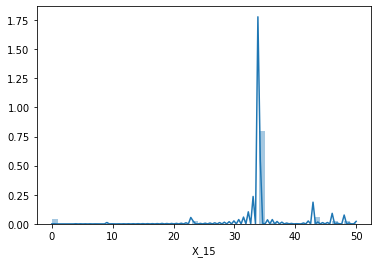

In [29]:
sns.distplot(df['X_15'])

In [30]:
1,8,9,10,12

(1, 8, 9, 10, 12)

In [38]:
df.corrwith(df['MULTIPLE_OFFENSE'])

X_1                 0.014034
X_2                -0.027293
X_3                -0.027218
X_4                -0.002921
X_5                -0.003450
X_6                -0.007903
X_7                -0.008036
X_8                -0.033397
X_9                -0.000748
X_10               -0.242596
X_11                0.105088
X_12               -0.113061
X_13                0.006512
X_14               -0.015267
X_15                0.044916
MULTIPLE_OFFENSE    1.000000
dtype: float64

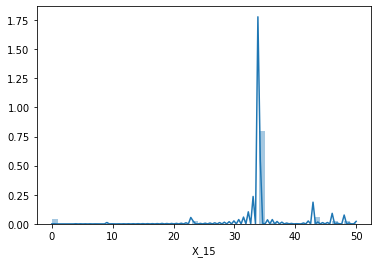

In [36]:
sns.distplot(df['X_15'])

In [39]:
1,9,11,13,15

(1, 9, 11, 13, 15)

In [43]:
X_train = df[['X_1','X_9','X_11','X_13','X_15']]
y_train = df['MULTIPLE_OFFENSE']

In [44]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

In [45]:
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [46]:
df_test = pd.read_csv('Test.csv')

In [47]:
X_test = df_test[['X_1','X_9','X_11','X_13','X_15']]

In [54]:
y_pred = clf.predict(X_test)

In [69]:
lst = []
for i in zip(df_test['INCIDENT_ID'],y_pred):
    lst.append(i)

In [70]:
p.size

15903

In [71]:
a = pd.DataFrame(lst)

In [72]:
a.head()

,0,1
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [73]:
writer = pd.ExcelWriter('second.xlsx',engine='xlsxwriter')
a.to_excel(writer,sheet_name='Sheet1')
writer.save()

In [74]:
df_test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [75]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scalar = StandardScaler()

In [81]:
df_new = df[['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']]

In [101]:
scalar.fit(df_new)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [102]:
scaled_data = scalar.transform(df_new)

In [103]:
#PCA
from sklearn.decomposition import PCA

In [139]:
pca = PCA(n_components=2)

In [140]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [141]:
X_pca = pca.transform(scaled_data)

In [142]:
scaled_data.shape

(23856, 15)

In [143]:
X_pca.shape

(23856, 2)

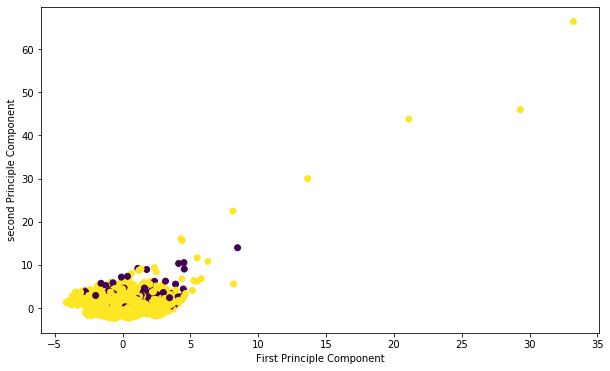

In [145]:
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=df['MULTIPLE_OFFENSE'])
plt.xlabel('First Principle Component')
plt.ylabel('second Principle Component')
plt.show()

In [146]:
df_comp = pd.DataFrame(pca.components_,columns=['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15'])

In [147]:
df_comp

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,-0.190075,-0.527902,-0.526438,0.184040,0.360298,-0.279009,-0.225851,0.145249,0.000358,0.183628,-0.044327,0.226523,-0.083925,-0.016363,-0.010422
1,0.365359,-0.045690,-0.037154,0.168928,0.124096,0.459769,0.484540,0.154560,0.066395,0.417907,-0.020091,0.403260,0.057052,-0.060979,-0.001742


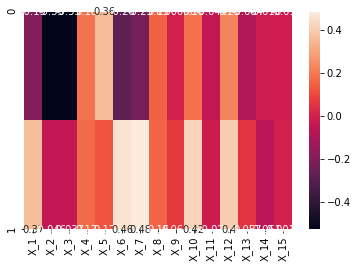

In [148]:
sns.heatmap(df_comp,annot=True)

In [173]:
from sklearn.svm import SVC
clf = MLPClassifier()

In [174]:
X = X_pca
y = df['MULTIPLE_OFFENSE']

In [175]:
clf.fit(X,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [176]:
#prediction = clf.predict(df_test[['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']])

predict = clf.predict(y_pca)

In [177]:
df_test['X_12'].fillna(0,inplace=True)

In [178]:
df_test_final = df_test[['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']]

In [179]:
pca.fit(df_test_final)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [180]:
y_pca = pca.transform(df_test_final)

In [181]:
y_pca.shape

(15903, 2)

In [182]:
predict.shape

(15903,)

In [183]:
lst = []
for i in zip(df_test['INCIDENT_ID'],predict):
    lst.append(i)

In [184]:
df_pred = pd.DataFrame(lst,columns=['INCIDENT_ID','MULTIPLE_OFFENSE'])

In [185]:
df_pred.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [186]:
writer = pd.ExcelWriter('second.xlsx',engine='xlsxwriter')
df_pred.to_excel(writer,sheet_name='Sheet1')
writer.save()